In [2]:
from textblob import TextBlob

text = "I love computer science"
blob = TextBlob(text)

print(f"Sentiment of the text: {blob.sentiment}")

Sentiment of the text: Sentiment(polarity=0.5, subjectivity=0.6)


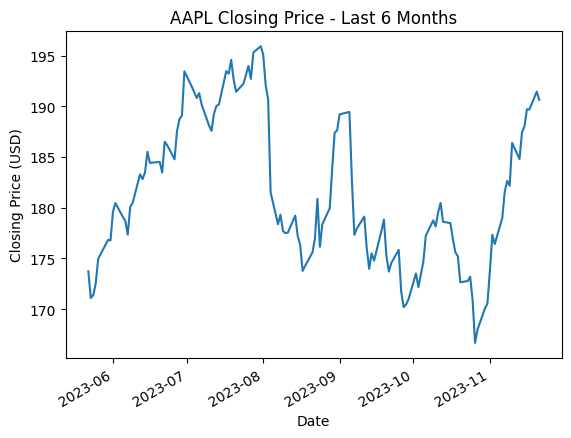

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch data for Apple Inc. (AAPL) for the last 6 months
aapl = yf.Ticker("AAPL")
data = aapl.history(period="6mo")

# Plot the closing prices
data['Close'].plot(title="AAPL Closing Price - Last 6 Months")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


# AI Application in Stock Market

A simple and basic application of AI on stock market data that's easy to run on Google Colab, without needing heavy package installations, is to perform basic trend analysis using linear regression. This approach can provide insights into the general trend of a stock's closing prices over time.

Here's a step-by-step guide to create a simple linear regression model for stock market trend analysis:

### 1. Install Required Libraries

```python
!pip install yfinance scikit-learn matplotlib
```

### 2. Import Libraries

```python
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
```

### 3. Fetch Stock Data

```python
# Fetching data for a stock (e.g., AAPL for Apple Inc.)
data = yf.download('AAPL', start='2021-01-01', end='2022-01-01')['Close']
```

### 4. Prepare Data for Linear Regression

```python
# Convert index to numerical value for regression analysis
data = data.reset_index()
data['Date'] = data['Date'].map(lambda date: date.toordinal())

# Splitting data into independent (X) and dependent (y) variables
X = data['Date'].values.reshape(-1, 1)
y = data['Close'].values
```

### 5. Create and Train Linear Regression Model

```python
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
```

### 6. Plotting the Results

```python
# Predicting the stock prices
y_pred = model.predict(X_test)

# Plotting the actual and predicted prices
plt.scatter(X_test, y_test, color='red', label='Actual Price')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Analysis')
plt.legend()
plt.show()
```

### Explanation:

- This script uses `yfinance` to download historical stock data (closing prices) for Apple Inc.
- We convert the dates to ordinal numbers because linear regression models require numerical inputs.
- The data is then split into training and test sets. The model is trained on the training set.
- We use the model to predict stock prices and plot these predictions against the actual prices to visualize the trend.

[*********************100%%**********************]  1 of 1 completed


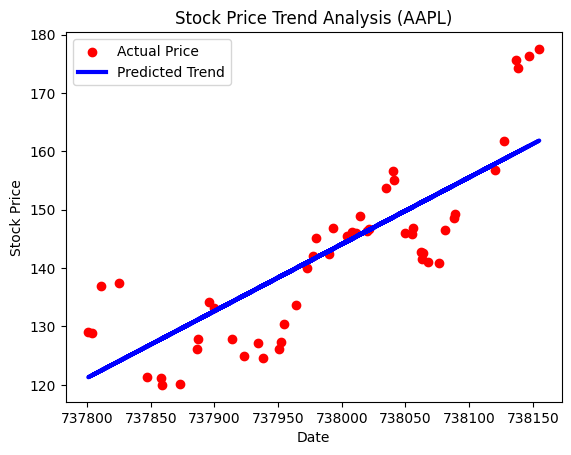

In [1]:
# Install required packages
# !pip install yfinance scikit-learn matplotlib

# Import libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

# Fetch stock data
data = yf.download('AAPL', start='2021-01-01', end='2022-01-01')['Close']

# Convert index (Date) to a numerical value for regression analysis
data = data.reset_index()
data['Date'] = data['Date'].map(lambda date: date.toordinal())

# Splitting data into independent (X) and dependent (y) variables
X = data['Date'].values.reshape(-1, 1)
y = data['Close'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the stock prices
y_pred = model.predict(X_test)

# Plotting the actual and predicted prices
plt.scatter(X_test, y_test, color='red', label='Actual Price')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Analysis (AAPL)')
plt.legend()
plt.show()


R-squared value: 0.6865590760005327


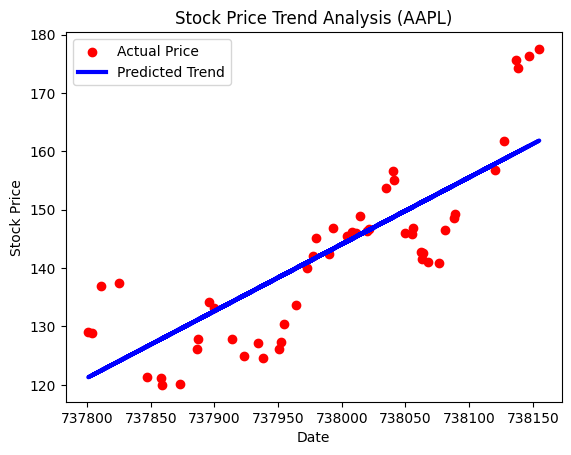

In [2]:
# Create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the stock prices
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = model.score(X_test, y_test)
print(f"R-squared value: {r_squared}")

# Plotting the actual and predicted prices
plt.scatter(X_test, y_test, color='red', label='Actual Price')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Analysis (AAPL)')
plt.legend()
plt.show()


In [3]:
from scipy.stats import pearsonr

# Calculate the Pearson Correlation Coefficient
correlation, _ = pearsonr(y_test, y_pred)
print(f"Pearson Correlation Coefficient (R): {correlation}")


Pearson Correlation Coefficient (R): 0.8348678485620338


In [4]:
import datetime as dt

# Example: Predicting stock price for a specific future date
future_date = dt.datetime(2023, 11, 22)
future_date_ordinal = future_date.toordinal()

# Predicting the stock price
predicted_price = model.predict([[future_date_ordinal]])
print(f"Predicted stock price for {future_date.strftime('%Y-%m-%d')}: ${predicted_price[0]:.2f}")


Predicted stock price for 2023-11-22: $241.04


The linear regression model we've trained on historical Apple (AAPL) stock data can technically be used to make future predictions, but there are important limitations and considerations to keep in mind:

1. **Linear Assumption**: Our model assumes a linear relationship between dates and stock prices. This is a very simplistic assumption, and real-world stock prices are influenced by a multitude of complex, often non-linear factors.

2. **Historical Data Only**: The model is based solely on historical data and does not account for future market conditions, economic changes, company performance, political events, or other factors that might influence stock prices.

3. **Predictive Accuracy**: The further you predict into the future, the less accurate the model tends to be, especially with a simplistic model like linear regression.

4. **Model Overfitting**: There's a risk of overfitting to the historical data, meaning the model might capture noise rather than the underlying trend.

5. **Financial Risk**: Stock market prediction is inherently risky, and predictions made with a simple linear regression model should be taken with caution. They should not be used as the sole basis for investment decisions.